In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('C:/Users/jing.o.li/Desktop/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")
feature_names = [each for each in data.columns if data[each].dtype in [np.int64]]
feature_names

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

In [5]:
x = data[feature_names]
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
model = RandomForestClassifier(random_state=0).fit(train_x, train_y)

C:\Users\jing.o.li\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


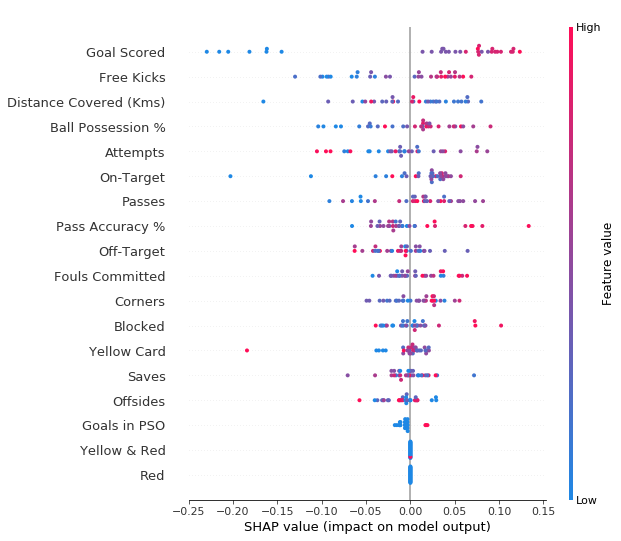

In [6]:
# Load package used to calculate Shap values
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_x)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_x)

There are few things worth noting. First, when plotting, we call "shap_values[1]'. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the FHAP values for the prediction of "True".

Second, calculating SHAP values an be slow. It isn't a problem here, becasue this dataset is small. But we will will want to be careful when runnig these to plot with reasonable sized datasets. 

This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

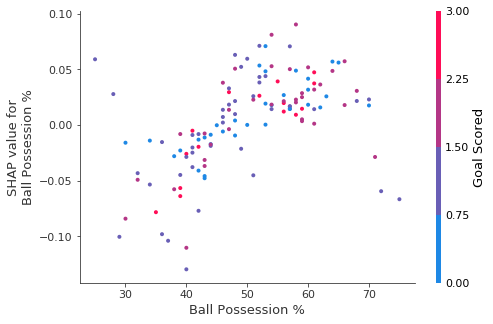

In [7]:
shap_values = explainer.shap_values(x)
shap.dependence_plot('Ball Possession %', shap_values[1], x, interaction_index="Goal Scored")